# Basque Country Tourism
- Andrea Martínez
- Sergio Salgado

##0. Preparation

### Install and import the necessary libraries

In [17]:
install.packages("readxl")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("plyr")
install.packages("data.table")
install.packages("wordcloud")
install.packages("tm")
install.packages("stringr")
install.packages("qdap")

library(stringr)
library(readxl)
library(dplyr)
library(tidyr)
library(plyr)
library(data.table)
library(wordcloud)
library(tm)
library(qdap)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Read the data from the given dataset

In [18]:
restaurants_data = read_excel("./data/restaurantes.xlsx")
accommodations_data = read_excel("./data/alojamientos.xlsx")

Warning message:
“Expecting numeric in W1002 / R1002C23: got 'HSS00808'”
Warning message:
“Expecting numeric in AB1002 / R1002C28: got '43.312416,-1.977987999999982'”
Warning message:
“Coercing text to numeric in AC1002 / R1002C29: '43.312416'”
Warning message:
“Expecting numeric in W1003 / R1003C23: got 'TVI00010'”
Warning message:
“Coercing text to numeric in AA1003 / R1003C27: '01477'”
Warning message:
“Expecting numeric in AB1003 / R1003C28: got '43.09502927988714,-3.0732163055572537'”
Warning message:
“Coercing text to numeric in AC1003 / R1003C29: '43.09502927988714'”
Warning message:
“Expecting numeric in W1004 / R1004C23: got 'HSS00557'”
Warning message:
“Expecting numeric in AB1004 / R1004C28: got '43.36227291,-1.78869327'”
Warning message:
“Coercing text to numeric in AC1004 / R1004C29: '43.36227291'”
Warning message:
“Expecting numeric in W1005 / R1005C23: got 'HBI01059'”
Warning message:
“Expecting numeric in AB1005 / R1005C28: got '43.26109286,-2.92513342'”
Warning message

### Check the datasets

In [19]:
str(accommodations_data)

tibble [1,278 × 44] (S3: tbl_df/tbl/data.frame)
 $ Nombre                           : chr [1:1278] "A ROOM IN THE CITY" "AB DOMINI" "ABAIENEA" "ABANDO" ...
 $ Descripción                      : chr [1:1278] "A room in the city es un hostal que permite a sus huéspedes conocer de cerca los encantos ..." "La pensión Ab Domini se encuentra en pleno corazón de la Parte Vieja de San Sebasti..." "Abaienea pone a tu disposición una casa de agroturismo y dos apartamentos rurales en Ari&n..." "Hotel de cuatro estrellas ubicado en un moderno edificio reformado de decoración vanguardi..." ...
 $ Tipo de Plantilla                : chr [1:1278] "Alojamientos" "Alojamientos" "Alojamientos" "Alojamientos" ...
 $ Localidad                        : chr [1:1278] NA "Donostia / San Sebastián" "Ariñiz/Aríñez" "Bilbao" ...
 $ Calidad                          : num [1:1278] NA NA NA NA NA NA NA NA NA NA ...
 $ Descripción del Icono de Calidad : chr [1:1278] NA NA NA NA ...
 $ Teléfono                        

In [20]:
str(restaurants_data)

tibble [707 × 45] (S3: tbl_df/tbl/data.frame)
 $ Nombre                                              : chr [1:707] "Abeletxe" "Abio Txakolina" "Aburuza" "Ados Basarte Txakolina" ...
 $ Descripción                                         : chr [1:707] "El albergue-restaurante está en un paraje natural, y ofrece la calidad de un restaurante c..." "Abio Txakolina es una bodega inscrita en la Denominación de Origen Bizkaiko Txakolina situ..." "Fundada en el año 1979, la familia Aburuza, una estirpe de larga tradición en la el..." "Esta bodega situada en Bakio ofrece una producción limitada de txakoli elaborada y embotel..." ...
 $ Tipo de Plantilla                                   : chr [1:707] "Restauración" "Restauración" "Restauración" "Restauración" ...
 $ Localidad                                           : chr [1:707] "Zizurkil" NA "Aduna" NA ...
 $ Calidad                                             : num [1:707] NA NA NA NA NA NA NA NA 1 NA ...
 $ Descripción del Icono de Calidad

### Create the dataframes from the given data

In [21]:
restaurants <- data.frame(restaurants_data)
accommodations <- data.frame(accommodations_data)

### Clean the data

In [22]:
# Cast the longitude and latitude to doubles
restaurants <- transform(restaurants, LATWGS84 = as.double(LATWGS84), LONWGS84 = as.double(LONWGS84))

# Drop the rows that have NA values in the column Localidad
restaurants <- restaurants %>%  
  drop_na(Localidad)

# Cleaning the Localidad column 
restaurants$Localidad <- gsub("[^[:alnum:] ] Diseminado","", as.character(restaurants$Localidad))

# Print the dataframe to make sure the changes were correctly applied
str(restaurants)

'data.frame':	573 obs. of  45 variables:
 $ Nombre                                              : chr  "Abeletxe" "Aburuza" "Aginaga" "Agorregi" ...
 $ Descripción                                         : chr  "El albergue-restaurante está en un paraje natural, y ofrece la calidad de un restaurante c..." "Fundada en el año 1979, la familia Aburuza, una estirpe de larga tradición en la el..." "La sidrería Aginaga ofrece la posibilidad de degustar sidra elaborada por ellos al txotx d..." "El restaurante Agorregi, ubicado en el barrio de Igara de San Sebastián, ofrece un servici..." ...
 $ Tipo.de.Plantilla                                   : chr  "Restauración" "Restauración" "Restauración" "Restauración" ...
 $ Localidad                                           : chr  "Zizurkil" "Aduna" "Aginaga" "Donostia / San Sebastián" ...
 $ Calidad                                             : num  NA NA NA NA NA 1 NA NA NA NA ...
 $ Descripción.del.Icono.de.Calidad                    : chr  NA 

In [23]:
# Cast the longitude and latitude to doubles
accommodations <- transform(accommodations, LATWGS84 = as.double(LATWGS84), LONWGS84 = as.double(LONWGS84))

# Drop the rows that have NA values in the column Localidad
accommodations <- accommodations %>%  
  drop_na(Localidad)

# Cleaning the Localidad column 
accommodations$Localidad <- gsub("[^[:alnum:] ] Diseminado","", as.character(accommodations$Localidad))

# Print the dataframe to make sure the changes were correctly applied
str(accommodations)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


'data.frame':	877 obs. of  44 variables:
 $ Nombre                           : chr  "AB DOMINI" "ABAIENEA" "ABANDO" "Abba Euskalduna Bilbao" ...
 $ Descripción                      : chr  "La pensión Ab Domini se encuentra en pleno corazón de la Parte Vieja de San Sebasti..." "Abaienea pone a tu disposición una casa de agroturismo y dos apartamentos rurales en Ari&n..." "Hotel de cuatro estrellas ubicado en un moderno edificio reformado de decoración vanguardi..." "Hotel de cuatro estrellas ubicado en el centro de Bilbao, frente al estadio de San Mamés y..." ...
 $ Tipo.de.Plantilla                : chr  "Alojamientos" "Alojamientos" "Alojamientos" "Alojamientos" ...
 $ Localidad                        : chr  "Donostia / San Sebastián" "Ariñiz/Aríñez" "Bilbao" "Bilbao" ...
 $ Calidad                          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Descripción.del.Icono.de.Calidad : chr  NA NA NA NA ...
 $ Teléfono                         : chr  "943 420 431" "945 290 640" "944 236 

## 1. Given a restaurant of your choice, find the 10 closest accommodations

###1.1 Set the restaurant name

In [24]:
# Set the name of the restaurant
restaurant_name = "Abeletxe"

###1.2 Extract the restaurant necessary information

In [25]:
# First we drop the rows with no coordinates (NA values in columns Longitude and Latitude)
restaurant_with_coordinates <- restaurants %>% 
  drop_na(LATWGS84, LONWGS84)

# Them we filter the restaurants by name
restaurant <- filter(restaurants, Nombre == restaurant_name)

# We extract the latitude from the restaurant as a double and save it
restaurant_x <- restaurant$LATWGS84
restaurant_x

# We extract the longitude from the restaurant as a double and save it
restaurant_y <- restaurant$LONWGS84
restaurant_y

[1] 43.20011

[1] -2.074827

###1.3 Create a dataframe based in accommodations and add a column with the module between the choosen restaurant and each accommodation to then sort it by distance in an ascending order

In [26]:
accommodations_with_distance <- accommodations %>%
  # Drop the rows with no coordinates (NA values in columns Longitude and Latitude)
  drop_na(LATWGS84, LONWGS84) %>%
  # Add a column that calculates the module between the restaurant and the accommodations
  mutate(Distancia = sqrt((LATWGS84 - restaurant_x)^2 + (LONWGS84 - restaurant_y)^2)) %>%
  # Order it by the distance column
  arrange(Distancia)

###1.4 Display the 10 nearest accommodations to the choosen restaurant

In [27]:
head(accommodations_with_distance, 10)

,Nombre,Descripción,Tipo.de.Plantilla,Localidad,Calidad,Descripción.del.Icono.de.Calidad,Teléfono,Dirección,Marcas,Diversidad.functional.física,⋯,Provincia,Código.provincia,País,Código.país,URL.amigable,URL.física,XML.datos,XML.metadatos,Zip,Distancia
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,PANCHICANE,"Alojamiento situado en Zizurkil, en la comarca guipuzcoana de Tolosaldea, en la margen izquierda ...",Alojamientos,Zizurkil,NA,NA,943 691 893,Hernandorena z.g.,Montes y Valles vascos,0,⋯,Gipuzkoa,20.0,España,108.0,https://turismoa.euskadi.eus/es/alojamientos/panchicane/aa30-12375/es/,https://turismoa.euskadi.eus/aa30-12375/es/contenidos/a_alojamiento/0000080061_a1_rec_turismo/es_80061/80061-ficha2.html,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000080061_a1_rec_turismo/es_80061/data/80061_openData.xml,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000080061_a1_rec_turismo/r01Index/0000080061_a1_rec_turismo-idxContent.xml,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000080061_a1_rec_turismo/opendata/0000080061_a1_rec_turismo.zip,0.001429858
2,GOIZALDI,"Casa de nueva construcción con 4 habitaciones dobles, dos baños, sala de estar para...",Alojamientos,Zizurkil,NA,NA,943 692 782,Zizurkil Sakabanatua/Diseminado 59,Montes y Valles vascos,0,⋯,Gipuzkoa,20.0,España,108.0,https://turismoa.euskadi.eus/es/alojamientos/casa-rural-goizaldi/aa30-12375/es/,https://turismoa.euskadi.eus/aa30-12375/es/contenidos/a_alojamiento/0000000370_a1_rec_turismo/es_370/370-ficha2.html,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000370_a1_rec_turismo/es_370/data/370_openData.xml,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000370_a1_rec_turismo/r01Index/0000000370_a1_rec_turismo-idxContent.xml,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000370_a1_rec_turismo/opendata/0000000370_a1_rec_turismo.zip,0.007114520
3,AKULEBI,"Caserío de reciente construcción ubicado en un entorno natural, en el barrio Legarreta de Villabo...",Alojamientos,Villabona,NA,NA,943 693 034,Legarreta Auzoa z.g.,Montes y Valles vascos,0,⋯,Gipuzkoa,20.0,España,108.0,https://turismoa.euskadi.eus/es/alojamientos/agroturismo-akulebi/aa30-12375/es/,https://turismoa.euskadi.eus/aa30-12375/es/contenidos/a_alojamiento/0000000498_a1_rec_turismo/es_498/498-ficha2.html,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000498_a1_rec_turismo/es_498/data/498_openData.xml,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000498_a1_rec_turismo/r01Index/0000000498_a1_rec_turismo-idxContent.xml,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000498_a1_rec_turismo/opendata/0000000498_a1_rec_turismo.zip,0.025771241
4,LETE,"Ubicado en la zona de Tolosaldea, en un entorno rural, se encuentra el caserío de Lete. To...",Alojamientos,Alkiza,NA,NA,943 691 264,Plaza Alkiza 5,Montes y Valles vascos,0,⋯,Gipuzkoa,20.0,España,108.0,https://turismoa.euskadi.eus/es/alojamientos/agroturismo-lete/aa30-12375/es/,https://turismoa.euskadi.eus/aa30-12375/es/contenidos/a_alojamiento/0000000376_a1_rec_turismo/es_376/376-ficha2.html,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000376_a1_rec_turismo/es_376/data/376_openData.xml,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000376_a1_rec_turismo/r01Index/0000000376_a1_rec_turismo-idxContent.xml,https://turismoa.euskadi.eus/contenidos/a_alojamiento/0000000376_a1_rec_turismo/opendata/0000000376_a1_rec_turismo.zip,0.044907577
5,BENTA ALDEA,"Situada en el corazón de Tolosaldea, la Pensión Benta Aldea dispone de 5 habitaciones con baño, t...",Alojamientos,Anoeta,NA,NA,943 654 079,Industrialdea poligonoa 38,Montes y Valles vascos,0,⋯,Gipuzkoa,20.0,España,108.0,https://turismoa.euskadi.eus/es/alojamientos/pension-benta-aldea/aa30-12375/es/,https://turismoa.euskadi.eus/aa30-12375/es/contenidos/a_alojamiento/0000035025_a1_rec_turismo/es_35025/35025-ficha2.html,https://turismoa.euskadi.eus

##2. Provide visual tools illustrating the top 5 cities/towns with the highest ratio of stars/accomodations

Localidad,stars,num_of_accommodations,ratio
<chr>,<dbl>,<int>,<dbl>
Akartegi,4,1,4
Argomaniz,4,1,4
Artatza,4,1,4
Artika,4,1,4
Askizu,4,1,4


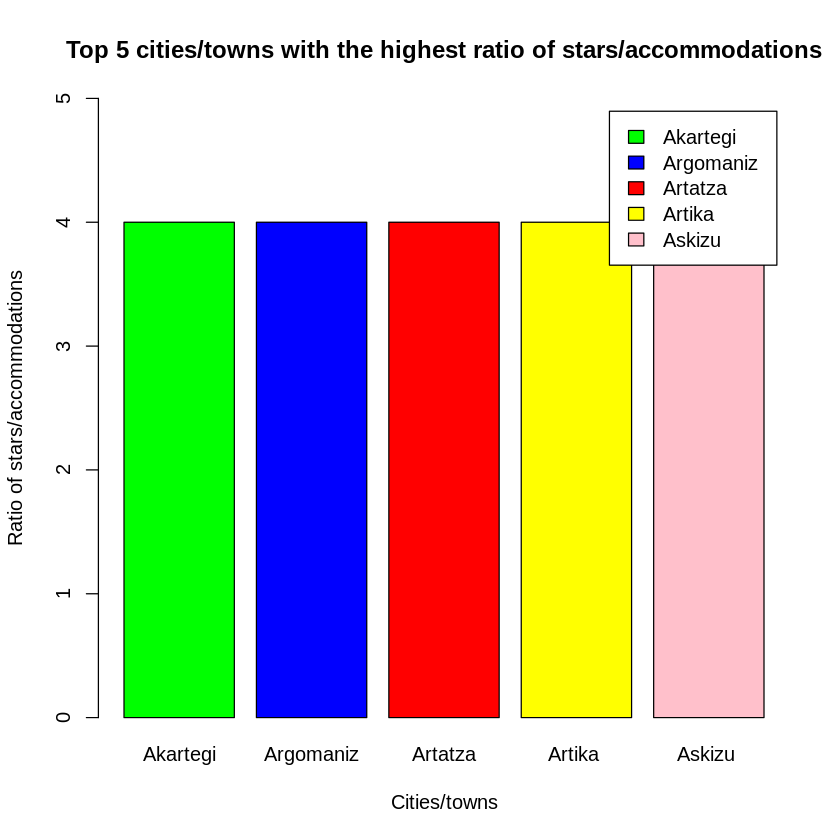

In [28]:
# Discard all no-numeric values ​​from the column "Categoría"
accommodations2 <- accommodations[accommodations$Categoría != 'S' & accommodations$Categoría != 'P' & accommodations$Categoría != 'T', ]

# Create a DataTable with the DataFrame "accommodations"
setDT(accommodations2)

# Sum the stars that each city has in a new colum "stars" and then get the number of accommodations in each city in a new column "num_of_accommodations"
accommodations3 <- accommodations2[ ,list(stars=sum(as.numeric(Categoría))), by=Localidad]
accommodations4 <- accommodations2 %>%
   group_by(Localidad) %>% 
    dplyr::summarise(num_of_accommodations = n())

# Merge bouth DataFrames by "Localidad" in other one named "total"
total <- merge(accommodations3, accommodations4, by = c("Localidad"), all=TRUE)

# We get the ratio dividing the stars between the accommodations and order by "ratio"
total$ratio = total$stars / total$num_of_accommodations
total <- total %>% 
  arrange(desc(ratio))

# Finally we get only the top 5 values
total = total[0:5,]
head(total)

# Plot with the top 5 cities/towns with the highest ratio of stars/accommodations
barplot(total$ratio,
        main = "Top 5 cities/towns with the highest ratio of stars/accommodations",
        xlab = "Cities/towns", 
        ylab = "Ratio of stars/accommodations",
        names = total$Localidad,
        col = c("green", "blue", "red", "yellow", "pink"),
        ylim = c(0,5),
        legend.text = total$Localidad,
        )

##3. Select the top 10 cities with the most total accommodation places

In [29]:
# First we group by column "Localidad", then we count the number of accommodations in each city, and finally we order them by quantity
accommodations5 <- accommodations %>%
   group_by(Localidad) %>% dplyr::summarise(num_of_accommodations = n()) %>% arrange(desc(num_of_accommodations))

# We print the first 10
head(accommodations5, 10)

Localidad,num_of_accommodations
<chr>,<int>
Donostia / San Sebastián,106
Bilbao,69
Vitoria-Gasteiz,41
Zarautz,22
Laguardia,12
Getaria,10
Irun,10
Itziar,9
Orio,9


##4. What are the 5 most common words in the text of the descriptions for each of the possible accommodation categories?

In [34]:
# Clean the Categoria column
accomodations_clear <- accommodations[accommodations$Categoría != 'S' & accommodations$Categoría != 'P' & accommodations$Categoría != 'T', ]
setDT(accomodations_clear)

# Create a dataframe grouped by category and with new column that concatenates the column Descripcion
accommodations_by_category <- accomodations_clear %>%
  # Group the dataset by the column Categoria
  dplyr::group_by(Categoría) %>%
  # Add a column with all the values in the column Descripcion concatenated
  dplyr::summarize(descripcion_grupo = paste0(Descripción, collapse = ""))
    
# Invert the columns to rows and vice versa to manage the values easier
accommodations_by_category_inverted <- as.data.frame(t(accommodations_by_category))

# Create a new df for each category where we create two columns indicating the 5 most common words in the text
Categoria_1 <- freq_terms(accommodations_by_category_inverted$V1, top =5, stopword = tm::stopwords("spanish"))
Categoria_2 <- freq_terms(accommodations_by_category_inverted$V2, top =5, stopword = tm::stopwords("spanish"))
Categoria_3 <- freq_terms(accommodations_by_category_inverted$V3, top =5, stopword = tm::stopwords("spanish"))
Categoria_4 <- freq_terms(accommodations_by_category_inverted$V4, top =5, stopword = tm::stopwords("spanish"))
Categoria_5 <- freq_terms(accommodations_by_category_inverted$V5, top =5, stopword = tm::stopwords("spanish"))

# Create a new df to concatenate the columns word and frequency and then both in a string
Categoria_1_str <- Categoria_1 %>%
  # Create a column that concatenates the columns WORD and FREQ separated by ':'
  dplyr::summarize(Concatenado = paste(WORD, ":", FREQ)) %>%
  # Create a column that concatenates values from Concatenado separated by ','
  dplyr::summarize(Resultado = paste0(Concatenado, collapse = ", "))

Categoria_2_str <- Categoria_2 %>%
  dplyr::summarize(Concatenado = paste(WORD, ":", FREQ)) %>%
  dplyr::summarize(Resultado = paste0(Concatenado, collapse = ", "))

Categoria_3_str <- Categoria_3 %>%
  dplyr::summarize(Concatenado = paste(WORD, ":", FREQ)) %>%
  dplyr::summarize(Resultado = paste0(Concatenado, collapse = ", "))

Categoria_4_str <- Categoria_4 %>%
  dplyr::summarize(Concatenado = paste(WORD, ":", FREQ)) %>%
  dplyr::summarize(Resultado = paste0(Concatenado, collapse = ", "))

Categoria_5_str <- Categoria_5 %>%
  dplyr::summarize(Concatenado = paste(WORD, ":", FREQ)) %>%
  dplyr::summarize(Resultado = paste0(Concatenado, collapse = ", "))

# Create the resulting df
Categoria <- c(1, 2, 3, 4, 5)
Resultado <- c(Categoria_1_str$Resultado, Categoria_2_str$Resultado, Categoria_3_str$Resultado, Categoria_4_str$Resultado, Categoria_5_str$Resultado)

# Create a df that store the category and the top 5 most common words as columns
dfResultado <- data.frame(Categoria, Resultado)

###4.1 Display the results in a dataframe

In [35]:
head(dfResultado, 5)

,Categoria,Resultado
,<dbl>,<chr>
1,1,"hotel : 31, ubicado : 31, situado : 29, pensión : 23, centro : 22, encuentra : 22"
2,2,"estrellas : 39, ubicado : 36, centro : 33, hotel : 31, dispone : 28"
3,3,"hotel : 24, ubicado : 17, situado : 13, centro : 12, apartamentos : 11"
4,4,"hotel : 28, estrellas : 20, ubicado : 20, situado : 16, cuatro : 15"
5,5,"hotel : 5, estrellas : 4, centro : 3, cinco : 3, arquitecto : 2, situado : 2"


###4.2 Display the results in plots


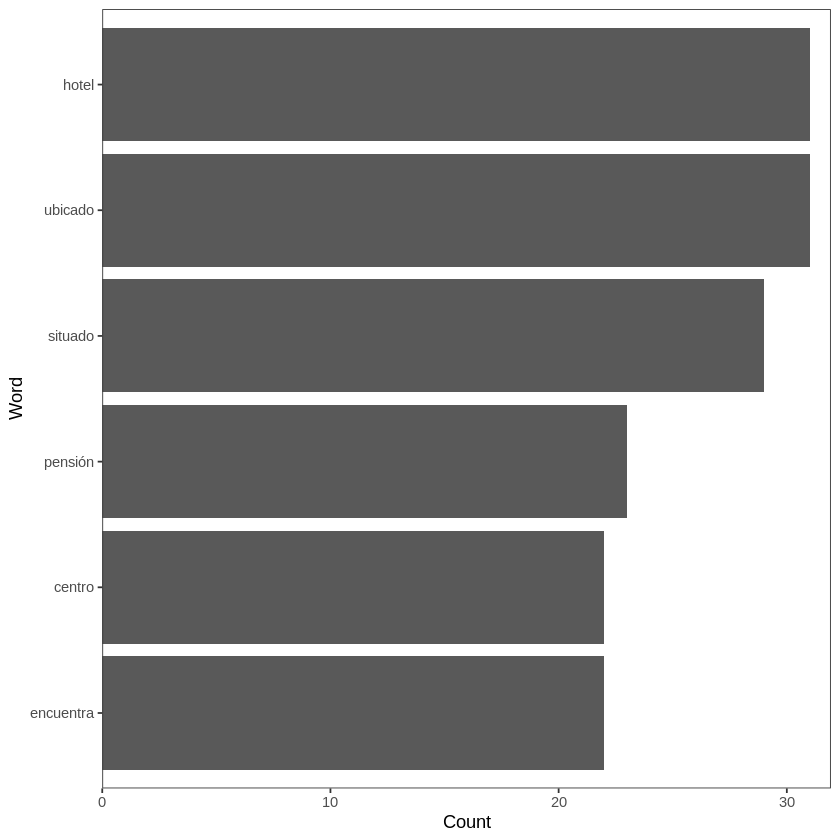

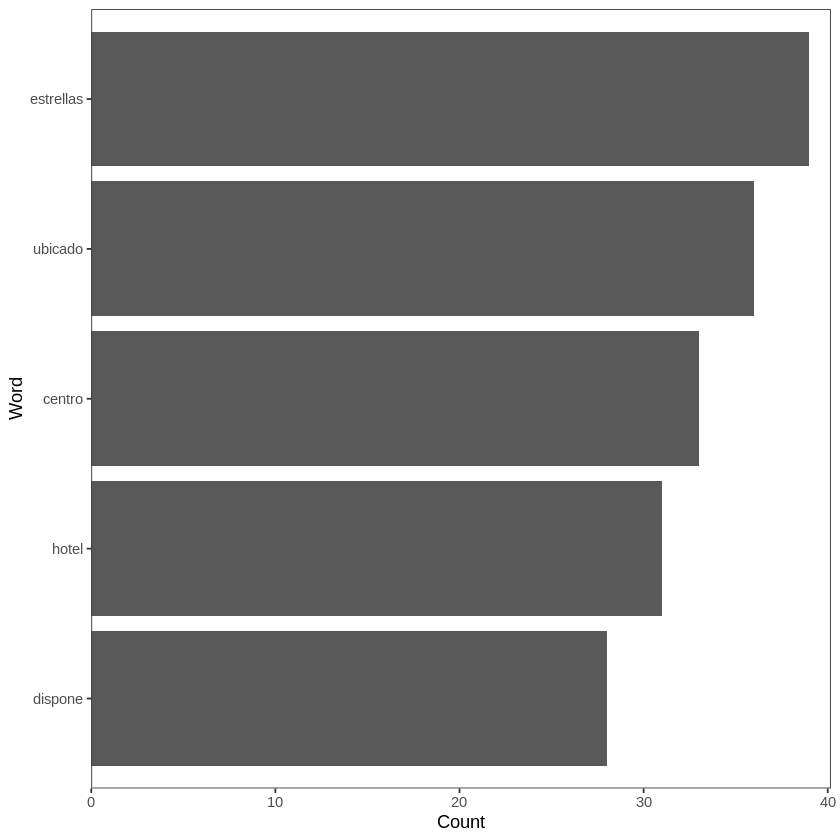

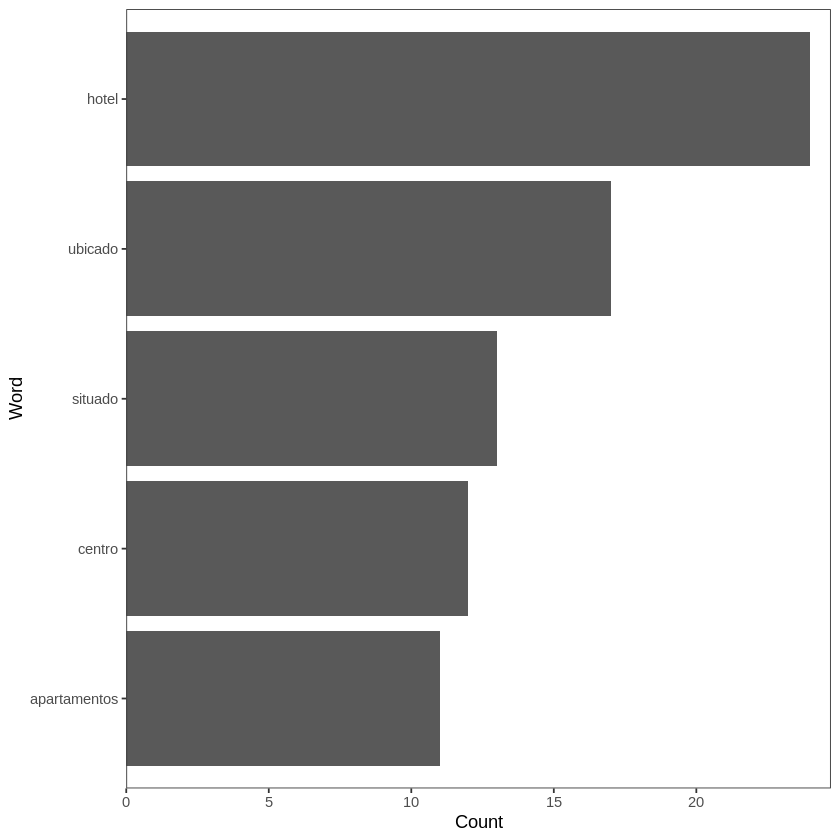

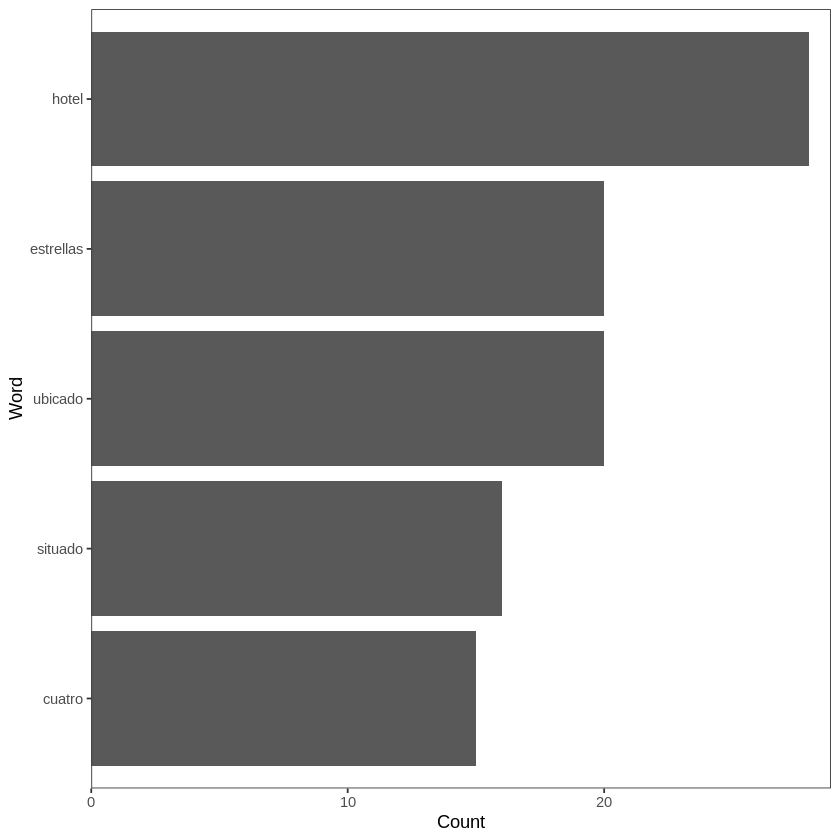

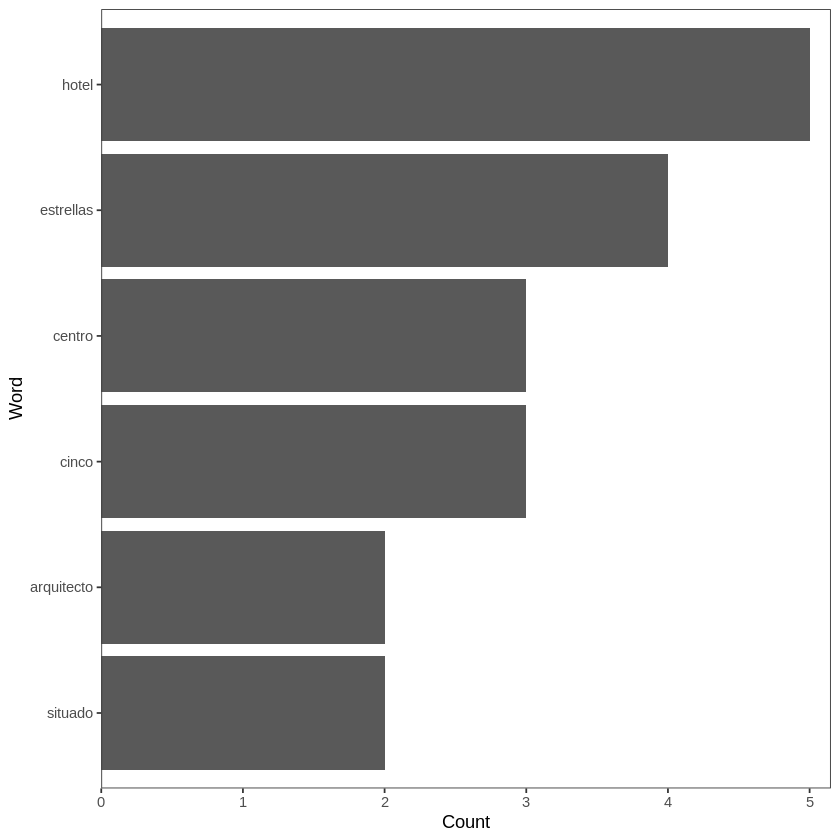

In [36]:
# Display the dataframe with the top 5 words per category as a plot
plot(Categoria_1)
plot(Categoria_2)
plot(Categoria_3)
plot(Categoria_4)
plot(Categoria_5)

##5. Select the top 10 cities/towns with the highest number of "Q for quality" awarded restaurants and accommodations

In [37]:
# Filter accommodations with "Q for quality", group by column "Localidad", and then count the number of accommodations in each city
accommodations6 <- filter(accommodations, Descripción.del.Icono.de.Calidad == 'Q de calidad')
accommodations6 <- accommodations6 %>% group_by(Localidad) %>% dplyr::summarise(num_of_accommodations_with_q = n())

# Filter restaurants with "Q for quality", group by column "Localidad", and then count the number of restaurants in each city
restaurants2 <- filter(restaurants, Descripción.del.Icono.de.Calidad == 'Q de calidad')
restaurants2 <- restaurants2 %>% group_by(Localidad) %>% dplyr::summarise(num_of_restaurants_with_q = n())

# Merge both Data Frames by "Localidad" in other one named "total" and put all the NA values to 0, to be able to operate with them
total <- merge(accommodations6, restaurants2, by = c("Localidad"), all=TRUE)
total[is.na(total)] <- 0

# After that, we sum the two columns with the number of accommodations and restaurants to have the total, and then delete that first two
total$num_total_with_q = rowSums (total[ , 2:3])
borrar <- c("num_of_accommodations_with_q", "num_of_restaurants_with_q")
total2 <- total[ , !(names(total) %in% borrar)]

# Finally order by "num_total_with_q" and print the first 10
total2 <- total2 %>% arrange(desc(num_total_with_q))
head(total2, 10)

,Localidad,num_total_with_q
,<chr>,<dbl>
1,Bilbao,10
2,Vitoria-Gasteiz,3
3,Argomaniz,1
4,Arranotegi,1
5,Donostia / San Sebastián,1
6,Elexalde,1
7,Elorriaga,1
8,Getaria,1
9,Izartza | Poblado Julio Arteche,1
